<a href="https://www.kaggle.com/code/kiranpathak97/waze-user-churn-statistical-analysis?scriptVersionId=141385304" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Statistical Analysis :

Do drivers who open the application using an iPhone have the same number of drives on average as drivers who use Android devices?

# Conduct a two-sample hypothesis test

In [1]:
import pandas as pd
from scipy import stats

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv("/kaggle/input/waze-dataset/waze_dataset.csv")

# Data exploration
Use descriptive statistics to conduct Exploratory Data Analysis (EDA).

**Note:** In the dataset, `device` is a categorical variable with the labels `iPhone` and `Android`.

In order to perform this analysis, we must turn each label into an integer.  The following code assigns a `1` for an `iPhone` user and a `2` for `Android`.  It assigns this label back to the variable `device_type`.

**Note:** Creating a new variable is ideal so that you don't overwrite original data.

1. Create a dictionary called `map_dictionary` that contains the class labels (`'Android'` and `'iPhone'`) for keys and the values you want to convert them to (`2` and `1`) as values.

2. Create a new column called `device_type` that is a copy of the `device` column.

3. Use the [`map()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html#pandas-series-map) method on the `device_type` series. Pass `map_dictionary` as its argument. Reassign the result back to the `device_type` series.

In [3]:
# 1. Create `map_dictionary`
map_dictionary = {'Android': 2, 'iPhone': 1}

# 2. Create new `device_type` column
df['device_type'] = df['device']

# 3. Map the new column to the dictionary
df['device_type'] = df['device_type'].map(map_dictionary)

df['device_type'].head()

0    2
1    1
2    2
3    1
4    2
Name: device_type, dtype: int64

We are interested in the relationship between device type and the number of drives. One approach is to look at the average number of drives for each device type. Calculate these averages.

In [4]:
df.groupby('device')['drives'].mean()

device
Android    66.231838
iPhone     67.859078
Name: drives, dtype: float64

>Based on the averages, it appears that drivers who use an iPhone device to interact with the application have a higher number of drives on average.

However, this difference might arise from random sampling, rather than being a true difference in the number of drives. To assess whether the difference is statistically significant, we can conduct a hypothesis test.

# Hypothesis testing

Conduct a two-sample t-test. Steps for conducting a hypothesis test:
1.   State the null hypothesis and the alternative hypothesis
2.   Choose a signficance level
3.   Find the p-value
4.   Reject or fail to reject the null hypothesis

**Note:** This is a t-test for two independent samples. This is the appropriate test since the two groups are independent (Android users vs. iPhone users).

**Hypotheses:**

$H_0$: There is no difference in average number of drives between drivers who use iPhone devices and drivers who use Androids.

$H_A$: There is a difference in average number of drives between drivers who use iPhone devices and drivers who use Androids.

5% as the significance level

We can use the `stats.ttest_ind(a , b, equal_var)` function to perform the test.


**Technical note**: The default for the argument `equal_var` in `stats.ttest_ind()` is `True`, which assumes population variances are equal. This equal variance assumption might not hold in practice (that is, there is no strong reason to assume that the two groups have the same variance); we can relax this assumption by setting `equal_var` to `False`, and `stats.ttest_ind()` will perform the unequal variances $t$-test (known as Welch's `t`-test).


1. Isolate the `drives` column for iPhone users.
2. Isolate the `drives` column for Android users.
3. Perform the t-test

In [5]:
# drives per iPhone users
iPhone = df[df['device_type'] == 1]['drives']

#drives per Android users
Android = df[df['device_type'] == 2]['drives']

#Perform t-test
stats.ttest_ind(a=iPhone, b= Android, equal_var=False)

Ttest_indResult(statistic=1.4635232068852353, pvalue=0.1433519726802059)

> *Since the p-value is larger than the chosen significance level (5%), we fail to reject the null hypothesis. There is **not** a statistically significant difference in the average number of drives between drivers who use iPhones and drivers who use Androids.*

# Hypothesis result

The t-test results concluded there is not a statistically significant difference in mean number of rides between iPhone users and Android users.

# Key Insight

* Based on the calculations,drivers who use an iPhone to interact with the application have a higher number of drives on average.

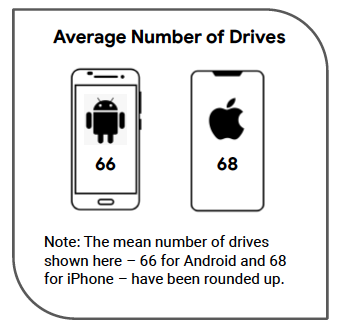

* But the key business insight is that drivers who use iPhone devices on average have a similar number of drives as those who use Androids as per hypothesis result.

# Next Steps
One potential next step is to explore what other factors influence the variation in the number of drives, and run additonal hypothesis tests to learn more about user behavior. Further, temporary changes in marketing or user interface for the Waze app may provide more data to investigate churn.